# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
stocks = pd.read_csv("../../data/stocks.csv", index_col=0, parse_dates=True)
stocks

,Company,Sector,Open,High,Low,Close,Volume
Date,,,,,,,
2017-11-02,AAPL,Technology,41.650002,42.125000,41.320000,42.027500,165573600
2017-11-03,AAPL,Technology,43.500000,43.564999,42.779999,43.125000,237594400
2017-11-06,AAPL,Technology,43.092499,43.747501,42.930000,43.562500,140105200
2017-11-07,AAPL,Technology,43.477501,43.812500,43.400002,43.702499,97446000
2017-11-08,AAPL,Technology,43.665001,44.060001,43.582500,44.060001,97638000
...,...,...,...,...,...,...,...
2022-10-26,COP,Energy,124.720001,128.179993,124.580002,126.570000,8139100
2022-10-27,COP,Energy,127.699997,129.449997,126.239998,126.639999,8948500
2022-10-28,COP,Energy,128.500000,128.990005,124.010002,127.169998,7293200


## Trend of Closing Prices

In [3]:
sectors = stocks["Sector"].unique()
sectors.sort()
sectors

array(['Communication Services', 'Consumer Cyclical', 'Energy',
       'Financial Services', 'Healthcare', 'Industrials', 'Technology'],
      dtype=object)

Function to plot stocks in a given sector:

In [4]:
def plot_closing_price(sector: pd.DataFrame, ax: plt.Axes):
    
    df = stocks[stocks["Sector"] == sector]
    df = df[df.index >= "2020-01-01"]

    for company in df["Company"].unique():
        closing_price = df[df["Company"] == company]["Close"]
        ax.plot(closing_price, label=company)
    
    ax.set_title(sector)
    ax.set_ylabel("Closing Price")
    ax.legend()
    ax.grid()

Plot all sectors:

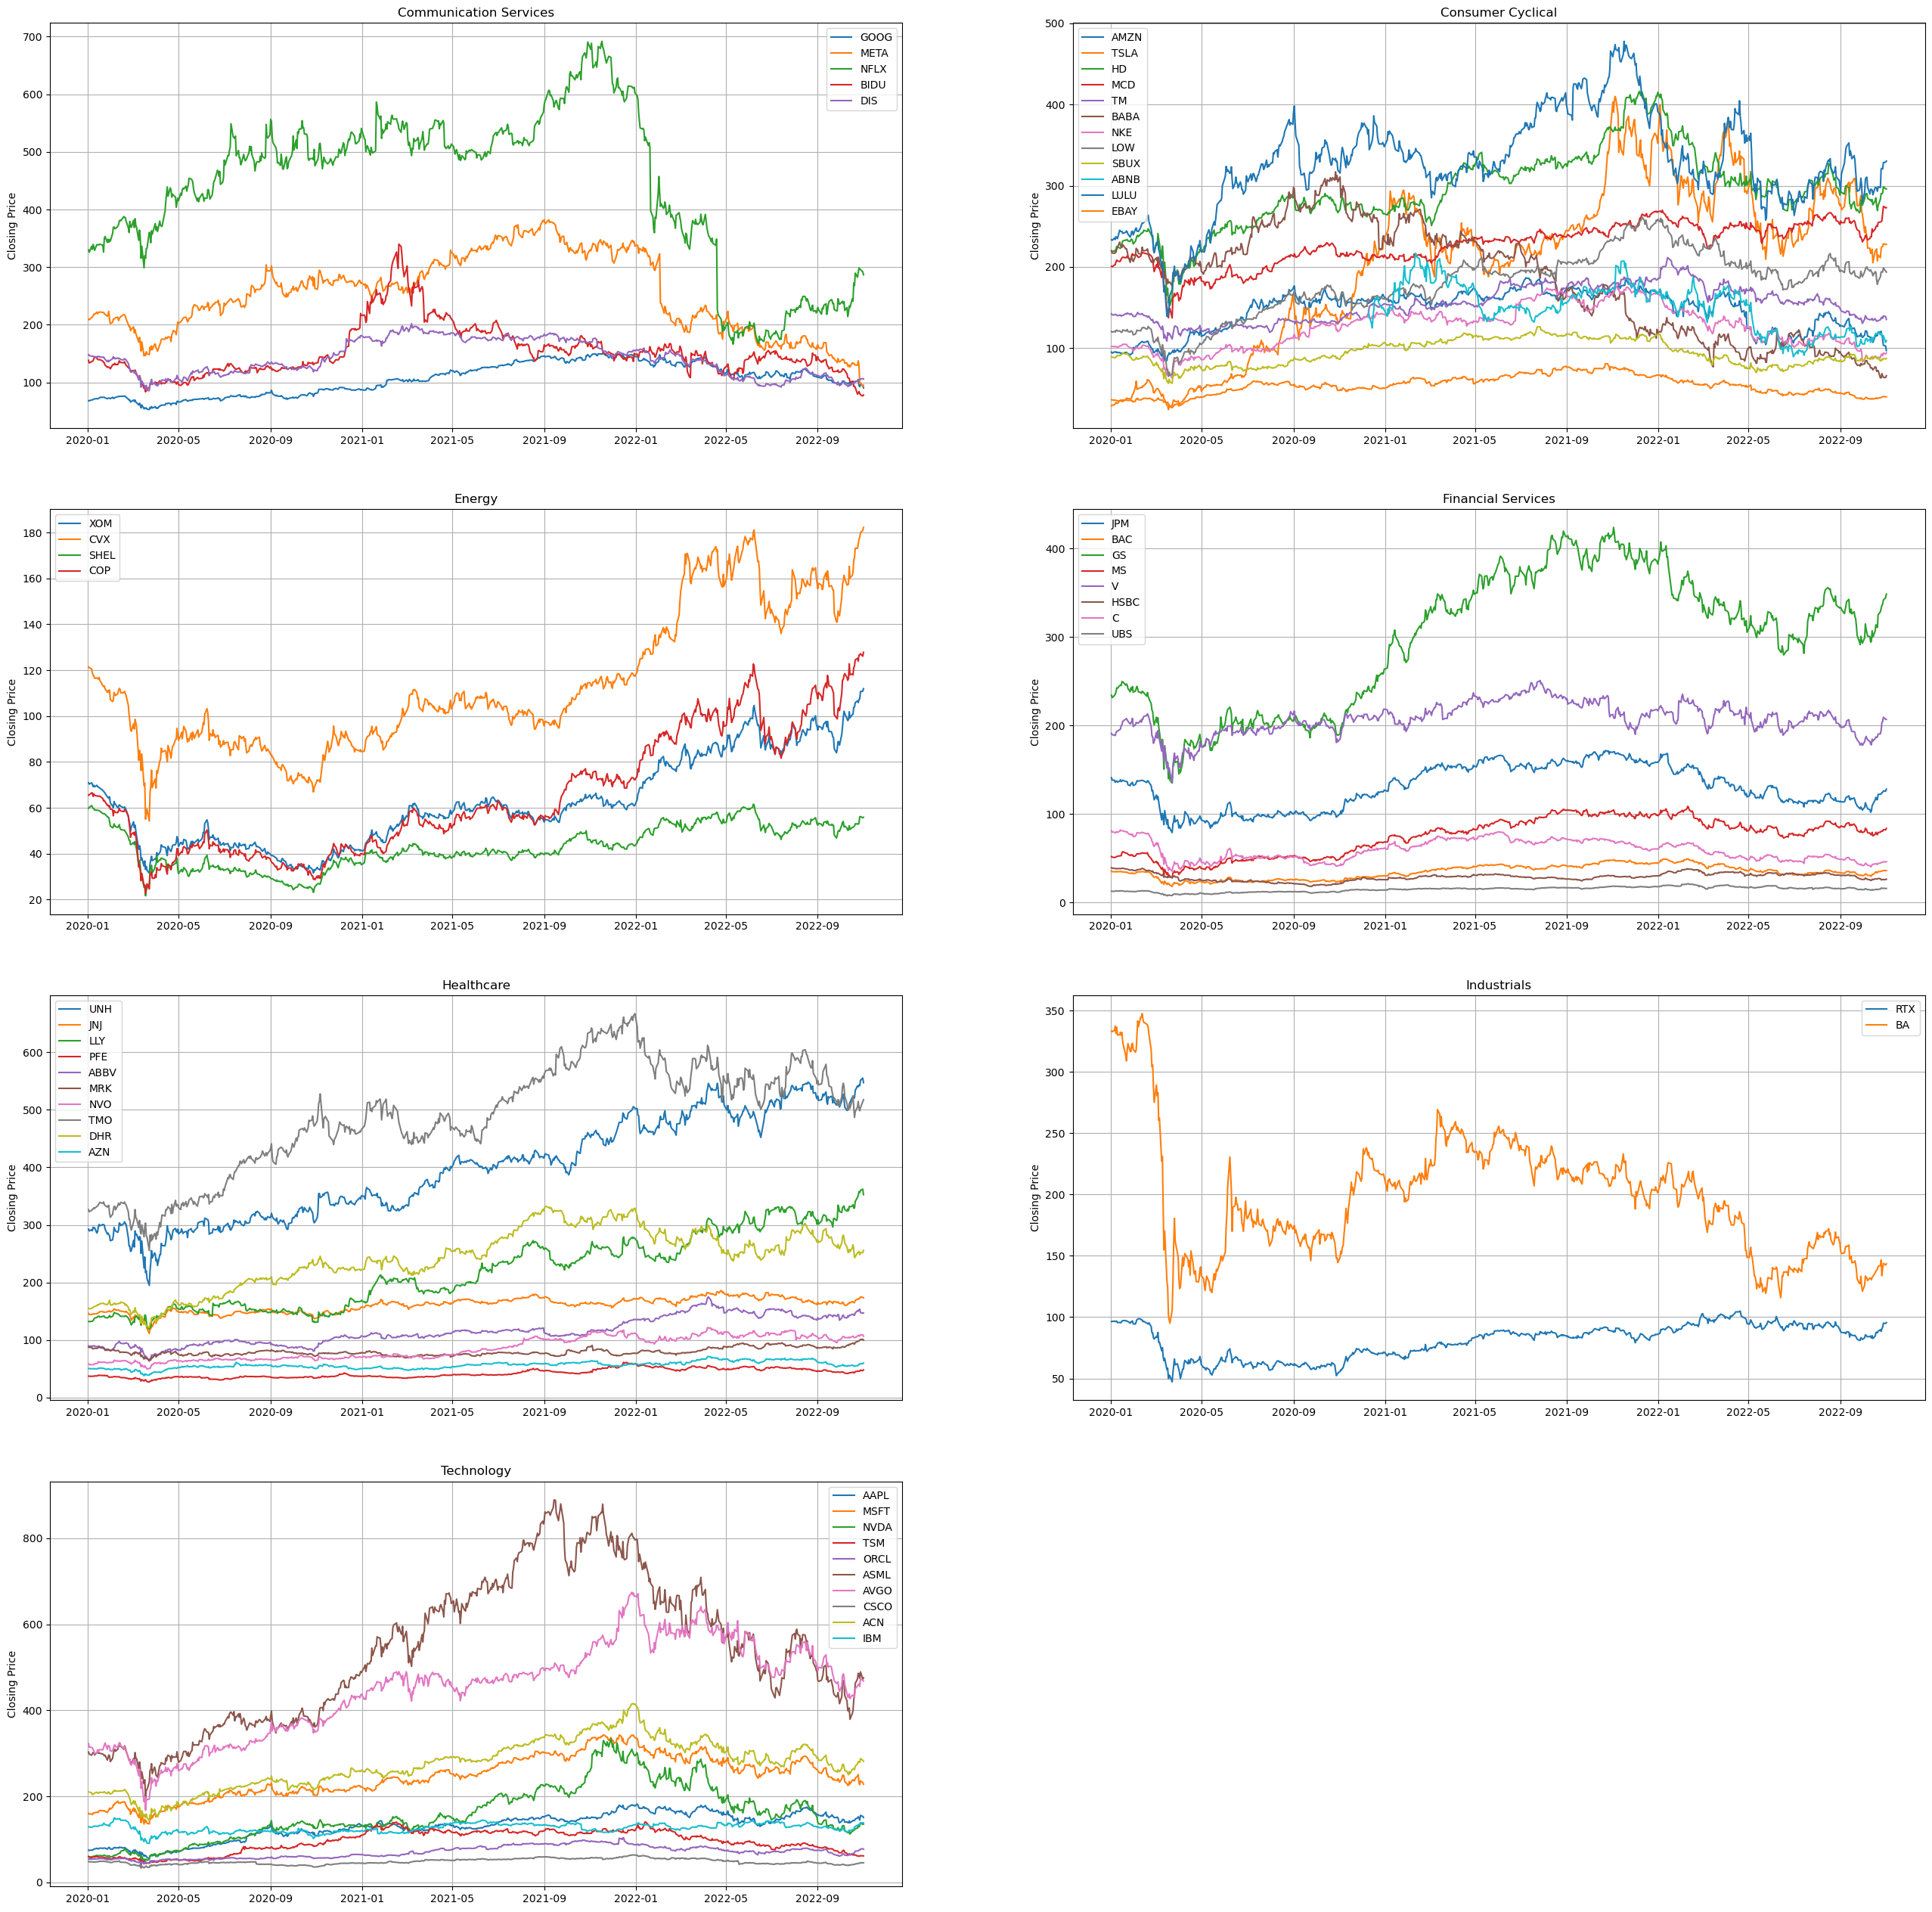

In [5]:
fig, axs = plt.subplots(4, 2, figsize=(32, 32))
axs = axs.flatten()

for i in range(7):
    plot_closing_price(sectors[i], axs[i])

# delete the last empty axes
plt.delaxes(axs[7])
plt.show()

## Evaluate Companies by Dollar Volumes

The **Dollar Volume** can be computed by

$$
\text{Dollar Volume} = \text{Closing Price} \times \text{Volume}
$$

Find the company with maximum *average* dollar volume in each sector:

In [6]:
df = stocks.copy()
df["Dollar Volume"] = stocks["Close"] * stocks["Volume"]
df.groupby(["Company", "Sector"]).mean()\
    .sort_values("Dollar Volume", ascending=False)\
    .reset_index(level=(0, 1))\
    .drop_duplicates(["Sector"])\
    .set_index("Sector").sort_index()\
    .drop(columns=["Open", "High", "Low"])

,Company,Close,Volume,Dollar Volume
Sector,,,,
Communication Services,META,220.069316,2.337455e+07,4.929304e+09
Consumer Cyclical,TSLA,126.995117,1.317317e+08,1.306260e+10
Energy,XOM,68.636971,2.044632e+07,1.327712e+09
Financial Services,BAC,32.406224,5.806661e+07,1.825491e+09
Healthcare,UNH,332.375851,3.532888e+06,1.128240e+09
Industrials,BA,262.674833,1.174971e+07,2.541470e+09
Technology,AAPL,94.923971,1.178255e+08,1.039713e+10
